In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nepal-earthquake-2015/eq2015.csv


# Introduction
###### The goal of this analysis is to predict the severity of the damage done by earhtquake in Nepal. 
###### Severity will be classified into non-severe (0) and severe (1). With that being said, we will see which model (between Logistics Regression and Decision Tree) is the suitable model that will produce the best result.

**Imports**
- 

In [2]:
# Imports
# ordinal and onehot encoder
# Logistic and Decision tree
# numpy, pandas, matplotlib
# accuracy score
# make_pipeline
# train_test split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from category_encoders import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# Data Exploration and cleaning
*Let's look at the data, then decide what subset of the data we will use to train and test the data*

In [3]:
# reading the data
eqData = pd.read_csv("/kaggle/input/nepal-earthquake-2015/eq2015.csv")
eqData.head(10)

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,damage_grade,technical_solution_proposed,superstructure
0,120101000011,12,1207,120703,1,1,9,288,9,9,...,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Used in risk,Grade 3,Major repair,has_superstructure_mud_mortar_stone
1,120101000021,12,1207,120703,1,1,15,364,9,9,...,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 5,Reconstruction,has_superstructure_mud_mortar_stone
2,120101000031,12,1207,120703,1,1,20,384,9,9,...,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 2,Minor repair,has_superstructure_mud_mortar_stone
3,120101000041,12,1207,120703,1,1,20,312,9,9,...,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 2,Minor repair,has_superstructure_mud_mortar_stone
4,120101000051,12,1207,120703,1,1,30,308,9,9,...,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 1,Minor repair,has_superstructure_mud_mortar_stone
5,120101000061,12,1207,120703,1,1,18,216,9,9,...,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Used in risk,Grade 2,Minor repair,has_superstructure_mud_mortar_stone
6,120101000071,12,1207,120703,1,0,13,234,9,0,...,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Rubble unclear,Grade 5,Reconstruction,has_superstructure_mud_mortar_stone
7,120101000081,12,1207,120703,1,1,8,280,9,9,...,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 2,Minor repair,has_superstructure_mud_mortar_stone
8,120101000091,12,1207,120703,1,1,22,268,9,9,...,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 3,Major repair,has_superstructure_mud_mortar_stone
9,120101000101,12,1207,120703,1,1,10,268,9,9,...,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Grade 3,Major repair,has_superstructure_mud_mortar_stone


In [4]:
eqData.shape

(762106, 21)

In [5]:
eqData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762106 entries, 0 to 762105
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   building_id                  762106 non-null  int64 
 1   district_id                  762106 non-null  int64 
 2   vdcmun_id                    762106 non-null  int64 
 3   ward_id                      762106 non-null  int64 
 4   count_floors_pre_eq          762106 non-null  int64 
 5   count_floors_post_eq         762106 non-null  int64 
 6   age_building                 762106 non-null  int64 
 7   plinth_area_sq_ft            762106 non-null  int64 
 8   height_ft_pre_eq             762106 non-null  int64 
 9   height_ft_post_eq            762106 non-null  int64 
 10  land_surface_condition       762106 non-null  object
 11  foundation_type              762106 non-null  object
 12  roof_type                    762106 non-null  object
 13  ground_floor_t

In [6]:
# let's drop observations with NAN since they are just few
eqData = eqData.dropna()

In [7]:
eqData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 762094 entries, 0 to 762105
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   building_id                  762094 non-null  int64 
 1   district_id                  762094 non-null  int64 
 2   vdcmun_id                    762094 non-null  int64 
 3   ward_id                      762094 non-null  int64 
 4   count_floors_pre_eq          762094 non-null  int64 
 5   count_floors_post_eq         762094 non-null  int64 
 6   age_building                 762094 non-null  int64 
 7   plinth_area_sq_ft            762094 non-null  int64 
 8   height_ft_pre_eq             762094 non-null  int64 
 9   height_ft_post_eq            762094 non-null  int64 
 10  land_surface_condition       762094 non-null  object
 11  foundation_type              762094 non-null  object
 12  roof_type                    762094 non-null  object
 13  ground_floor_type  

In [8]:
# let's see the number of districts
print(eqData["district_id"].nunique())
print(f"The unique districts are {eqData.district_id.unique()}")

11
The unique districts are [12 20 21 22 23 24 28 29 30 31 36]


##### Let's how many observations for each of the districts

From the Chart we can see that district 24, has the highest number of observation with 98019


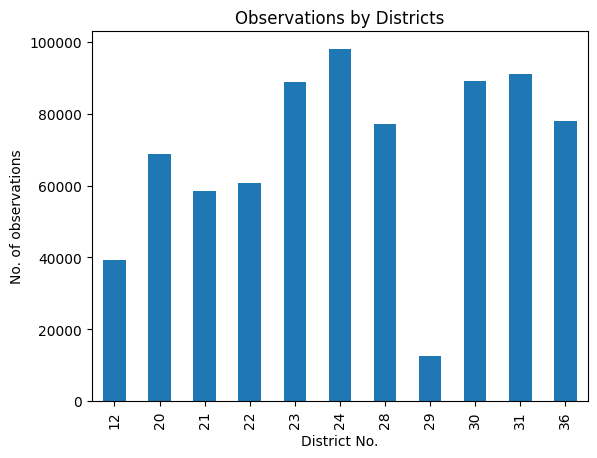

In [9]:
districtCount = eqData.groupby("district_id")["building_id"].count()
maxDistrict = eqData.groupby("district_id")["building_id"].count().max()
districtCount.plot(kind = "bar")
plt.xlabel("District No.")
plt.ylabel("No. of observations")
plt.title("Observations by Districts")
print(f"From the Chart we can see that district 24, has the highest number of observation with {maxDistrict}")

In [10]:
#eqData["damage_grade"] = eqData["damage_grade"].str[-1].astype("int")
#eqData["severe_damage"] =  
print(eqData[eqData["district_id"] == 24].groupby("damage_grade")["district_id"].count())

damage_grade
Grade 1     8330
Grade 2    11726
Grade 3    25130
Grade 4    28974
Grade 5    23859
Name: district_id, dtype: int64


In [11]:
# Let's see what types of repairs that are needed
print(eqData[eqData["district_id"] == 24].groupby("technical_solution_proposed")["district_id"].count())

technical_solution_proposed
Major repair      22306
Minor repair      12997
No need            5641
Reconstruction    57075
Name: district_id, dtype: int64


**Data wrangling**
-

### Let's subset and clean the data before exploring more

In [12]:
# function for wrangling
def wrangle(filepath):
    df = pd.read_csv(filepath, index_col="building_id")
    # drop the nan values
    df = df.dropna()
    
    # subset data to just data for district 24
    df = df[df["district_id"] == 24]
    
    # create a list of columns to drop starting from columns that will give our model information of the posteq
    drop_col = [col for col in df.columns if "post_eq" in col]
    
    # i am classifying the extent of damage by damage grade 1-3 as 0 (not severe) and grade 4 - 5  as 1 (severe)
    df["damage_grade"] = df["damage_grade"].str[-1].astype("int")
    df["severe_damage"] = (df["damage_grade"] > 3).astype("int")
    
    # drop damage grade
    drop_col.append("damage_grade")
    
    # drop non-needed and muilticardinal columns
    drop_col.extend(["district_id", "vdcmun_id", "ward_id"])
    
    # drop technical_solution_proposed becaused it is a solution to anything post earthquake
    drop_col.append("technical_solution_proposed")
    
    # drop correlational column
    drop_col.append("count_floors_pre_eq")
    
    
    # drop drop_col
    df.drop(columns = drop_col, inplace = True)
    
    return df

In [13]:
df = wrangle('/kaggle/input/nepal-earthquake-2015/eq2015.csv')
df.head()

,age_building,plinth_area_sq_ft,height_ft_pre_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,superstructure,severe_damage
building_id,,,,,,,,,,,,
240101000011,40,324,12,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,has_superstructure_mud_mortar_stone,0
240101000021,30,382,20,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Attached-1 side,Rectangular,has_superstructure_mud_mortar_stone,1
240101000031,13,405,10,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,has_superstructure_mud_mortar_stone,1
240101000041,25,328,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,Timber-Planck,Not attached,Rectangular,has_superstructure_mud_mortar_stone,1
240101000051,15,405,20,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,has_superstructure_mud_mortar_stone,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98019 entries, 240101000011 to 249009000991
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age_building            98019 non-null  int64 
 1   plinth_area_sq_ft       98019 non-null  int64 
 2   height_ft_pre_eq        98019 non-null  int64 
 3   land_surface_condition  98019 non-null  object
 4   foundation_type         98019 non-null  object
 5   roof_type               98019 non-null  object
 6   ground_floor_type       98019 non-null  object
 7   other_floor_type        98019 non-null  object
 8   position                98019 non-null  object
 9   plan_configuration      98019 non-null  object
 10  superstructure          98019 non-null  object
 11  severe_damage           98019 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 9.7+ MB


*Note: Wrangle function was iterated upon , the next 2 code below will not run because i have deleted *"district_id", "count_floors_pre_eq"* from the dataset*

In [15]:
# let's search for correlation
# corr = df.select_dtypes("number").drop(columns = ["severe_damage","district_id"]).corr()
# sns.heatmap(corr)

#### It can be seen that **"height_ft_pre_eq"** and **"count_floors_pre_eq"** have high correlation. So one of them has to be dropped in the wrangle function. But let's see which one works best with the **"severe_damage"**

In [16]:
height = df["severe_damage"].corr(df["height_ft_pre_eq"])
# floors = df["severe_damage"].corr(df["count_floors_pre_eq"])
# print(f"Height corr: {height}, floor corr: {floors}")
print(f"Height corr: {height}")

Height corr: -0.15984250802434435


**More exploration** 
-

In [17]:
# let's see the foundation type contributed to the damage 
df.pivot_table(index = "foundation_type", values = "severe_damage").sort_values("severe_damage")

,severe_damage
foundation_type,
RC,0.010949
Bamboo/Timber,0.267281
Cement-Stone/Brick,0.272224
Other,0.314741
Mud mortar-Stone/Brick,0.600677


#### From the calculation above, we can see that buildings with RC (Reinforced Concrete) performed better that every other types of foundation. With that said lets see the number of buildings with each of the unique foundation type. Then we'll check for roof_type.

foundation_type
Other                       251
Bamboo/Timber               651
Cement-Stone/Brick         5062
RC                         6941
Mud mortar-Stone/Brick    85114
Name: severe_damage, dtype: int64


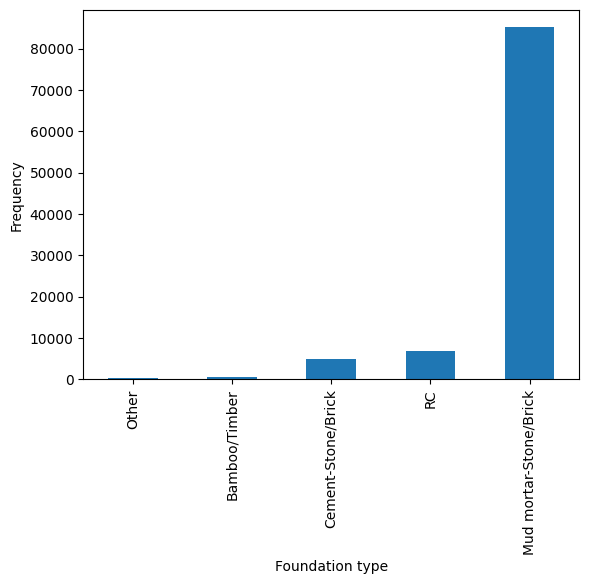

In [18]:
foundation = df.groupby("foundation_type")["severe_damage"].count().sort_values()
foundation.plot(kind = "bar", xlabel = "Foundation type", ylabel= "Frequency")
print(foundation)

In [19]:
# let's see the foundation type contributed to the damage 
df.pivot_table(index = "roof_type", values = "severe_damage", aggfunc = np.mean).sort_values("severe_damage")

/tmp/ipykernel_17/2649372442.py:2: FutureWarning: The provided callable <function mean at 0x7ad7ccbddc60> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.pivot_table(index = "roof_type", values = "severe_damage", aggfunc = np.mean).sort_values("severe_damage")


,severe_damage
roof_type,
RCC/RB/RBC,0.037574
Bamboo/Timber-Heavy roof,0.570629
Bamboo/Timber-Light roof,0.601164


roof_type
RCC/RB/RBC                  10007
Bamboo/Timber-Heavy roof    14824
Bamboo/Timber-Light roof    73188
Name: severe_damage, dtype: int64


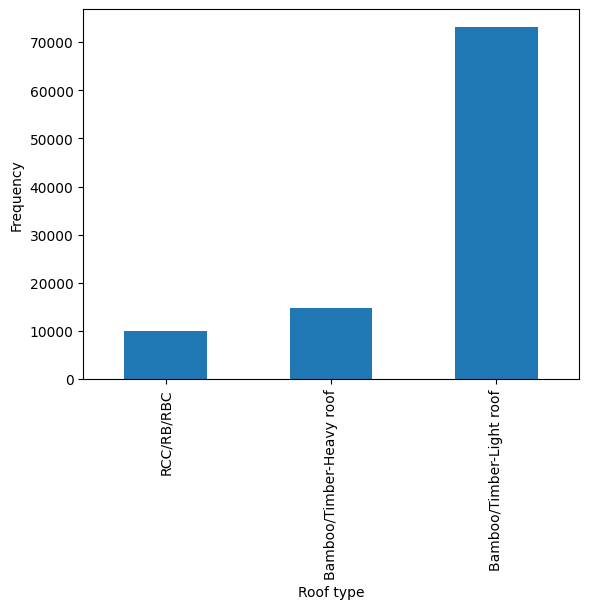

In [20]:
roof = df.groupby("roof_type")["severe_damage"].count().sort_values()
roof.plot(kind = "bar", xlabel = "Roof type", ylabel= "Frequency")
print(roof)

severe_damage
1    0.539008
0    0.460992
Name: proportion, dtype: float64


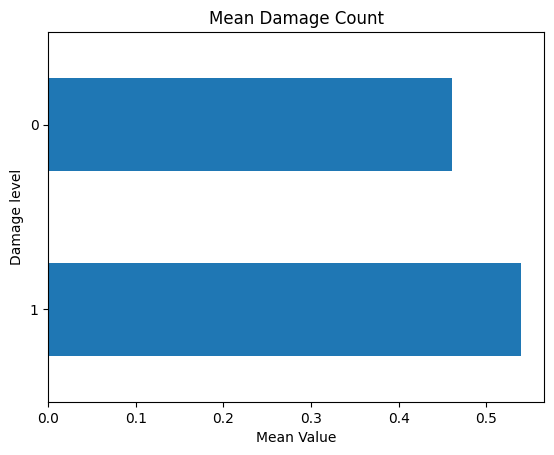

In [21]:
# let's see which type of damage is more
damagecount = df["severe_damage"].value_counts(normalize=True)
print(damagecount)
damagecount.plot(kind = "barh", xlabel = "Mean Value", ylabel = "Damage level", title = "Mean Damage Count");

#### It can be seen that we have more severely damaged builings that would need total reconstruction.

# Modelling
#### It time to build a model that will fit the dataset. I will use two different models to see which will produce the best result fo the data

In [22]:
df.shape

(98019, 12)

**Split**
-
#### Split into Train and Test data, Then split the train data into train and validation data.
#### Validation data will be used later on

In [23]:
# Target and Features
target = "severe_damage"
X = df.drop(columns = target)
y = df[target]

In [24]:
# Train and test data
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train = {X_train.shape}")
print(f"X_test = {X_test.shape}")
print(f"y_train = {y_train.shape}")
print(f"y_test = {y_test.shape}")

X_train = (78415, 11)
X_test = (19604, 11)
y_train = (78415,)
y_test = (19604,)


In [25]:
# Now to get the validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"X_train = {X_train.shape}")
print(f"X_val = {X_val.shape}")
print(f"y_train = {y_train.shape}")
print(f"y_val = {y_val.shape}")

X_train = (62732, 11)
X_val = (15683, 11)
y_train = (62732,)
y_val = (15683,)


**Baseline Model**
-
#### My baseline model will be the max severe damage grade. 
#### The point is to see if a building is severely damaged or not 

In [26]:
baseline =  y_train.value_counts(normalize=True).max()
print(f"Baseline Accuracy is {baseline:.2}")

Baseline Accuracy is 0.54


**Iterate - Logistic Regression**
-
#### Firstly, i will use the Logistic Regression to build a model pipeline 
#### Same process will be used for Decision Tree classifier

### Logistic Regression

In [27]:
# build and train the model
Log_Model = make_pipeline(OneHotEncoder(use_cat_names=True), LogisticRegression(max_iter=1000))
Log_Model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['land_surface_condition',
                                     'foundation_type', 'roof_type',
                                     'ground_floor_type', 'other_floor_type',
                                     'position', 'plan_configuration',
                                     'superstructure'],
                               use_cat_names=True)),
                ('logisticregression', LogisticRegression(max_iter=1000))])

**Evaluation and Visualization - Logistic Regression**
-

In [28]:
# Let's use the test model to predict and get the accuracy score
# there two ways i can get the accuracy score but they give the same result, i actually love the second
train_accuracy = accuracy_score(y_train, Log_Model.predict(X_train))
test_accuracy = accuracy_score(y_test, Log_Model.predict(X_test))
test_score_accuracy = Log_Model.score(X_test, y_test)

# Let's see how it predicted the first 10 test data
print(Log_Model.predict(X_test)[:20])

print("Accuracy score for the train data: ",train_accuracy)
print("Accuracy score for the test data: ", test_accuracy)
print("Accuracy score for the test data: ",test_score_accuracy)

[1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1]
Accuracy score for the train data:  0.6548810814257476
Accuracy score for the test data:  0.6535911038563559
Accuracy score for the test data:  0.6535911038563559


#### Compared to the Baseline model, this model performed well, Though more on the training data
#### According to the predicted result, let's see the probability rate in which it decided that the building is going to be severely damaged

In [29]:
test_prediction_probability = Log_Model.predict_proba(X_test)
print(test_prediction_probability[:20])

[[0.29822447 0.70177553]
 [0.45569665 0.54430335]
 [0.48697347 0.51302653]
 [0.39762978 0.60237022]
 [0.38308115 0.61691885]
 [0.38797309 0.61202691]
 [0.41266407 0.58733593]
 [0.38532981 0.61467019]
 [0.39576406 0.60423594]
 [0.34624965 0.65375035]
 [0.373433   0.626567  ]
 [0.3783972  0.6216028 ]
 [0.59328653 0.40671347]
 [0.51025282 0.48974718]
 [0.50394985 0.49605015]
 [0.49539495 0.50460505]
 [0.38342287 0.61657713]
 [0.95371432 0.04628568]
 [0.35850081 0.64149919]
 [0.40532329 0.59467671]]


#### With this, it can be seen that buildings with a probability of more than 0.5 is considered as severely damaged, which lesser is conisdered as not. 

### Next step is to see what features of the building contributed to the prediction

In [30]:
features = Log_Model.named_steps["onehotencoder"].get_feature_names_out()
importance = Log_Model.named_steps["logisticregression"].coef_[0]
odds_ratio = pd.Series(np.exp(importance),index = features).sort_values()
odds_ratio

foundation_type_RC                                       0.439671
roof_type_RCC/RB/RBC                                     0.490518
superstructure_has_superstructure_cement_mortar_brick    0.517368
ground_floor_type_RC                                     0.537128
other_floor_type_Not applicable                          0.639176
foundation_type_Bamboo/Timber                            0.659012
superstructure_has_superstructure_rc_non_engineered      0.664074
superstructure_has_superstructure_rc_engineered          0.743000
position_Not attached                                    0.775421
superstructure_has_superstructure_timber                 0.782334
superstructure_has_superstructure_other                  0.839314
other_floor_type_RCC/RB/RBC                              0.843371
plan_configuration_L-shape                               0.846600
land_surface_condition_Flat                              0.886263
position_Attached-1 side                                 0.888787
superstruc

#### Lol. Let's just visualize it for more understanding.
#### Let's see what features that contributed less to a building likely to be damaged by earthquake in Nepal district 24

Text(0.5, 1.0, 'Probability ratio of Structural features less likely to be affected by earthquake')

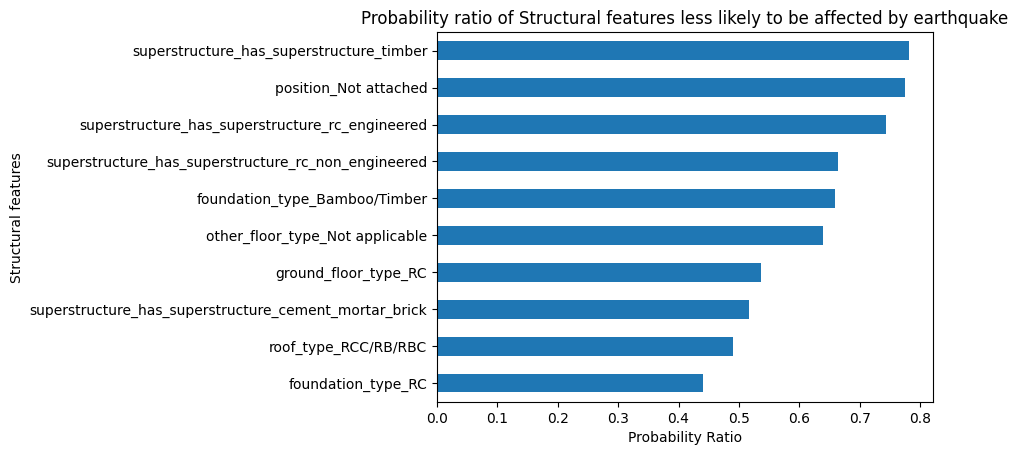

In [31]:
odds_ratio.head(10).plot(kind = "barh", xlabel = "Probability Ratio", ylabel = "Structural features" )
plt.title("Probability ratio of Structural features less likely to be affected by earthquake")

#### Well the chart is quite understandable. The probability of buildings with Reinforced concrete foundation and roof are less likely to be damaged by earthquake

#### Let's see those features that are more likey be affected by earthquake

Text(0.5, 1.0, 'Probability ratio of Structural features more likely to be affected by earthquake')

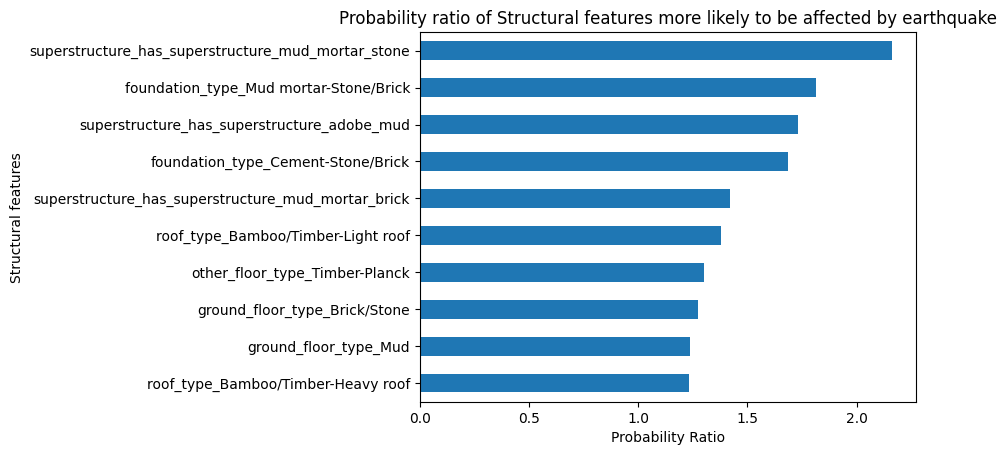

In [32]:
odds_ratio.tail(10).plot(kind = "barh", xlabel = "Probability Ratio", ylabel = "Structural features" )
plt.title("Probability ratio of Structural features more likely to be affected by earthquake")

#### It can be seen that buildings with structure of Mud, mortar and stone are 2x more likely to be damaged by earthquake

**Iterate - Decision Tree Classifier**
-

#### This process will go through two - three steps:
##### 1. Train and evaulate without using a hyperparameter, then check the max_depth
##### 2. Loop to see the favourable max_depth at which the model can be certain to be purified
##### 3. Visualize, train and test the best max_depth for the model

#### The purpose of the validation data is to help me tune or tweak the decision tree model to get the best depth hypermeter, before introducing the model to a test data

In [33]:
# Step 1
Decision_model = make_pipeline(
                                OrdinalEncoder(), 
                               DecisionTreeClassifier(random_state=42)
                              )
Decision_model.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['land_surface_condition',
                                      'foundation_type', 'roof_type',
                                      'ground_floor_type', 'other_floor_type',
                                      'position', 'plan_configuration',
                                      'superstructure'],
                                mapping=[{'col': 'land_surface_condition',
                                          'data_type': dtype('O'),
                                          'mapping': Flat              1
Moderate slope    2
Steep slope       3
NaN              -2
dtype: int64},
                                         {'col': 'foundation_type',
                                          'dat...
has_superstructure_cement_mortar_brick     3
has_superstructure_adobe_mud               4
has_superstructure_mud_mortar_brick        5
has_superstructure_stone_flag              6
has_superstructure_cement_mortar_stone     7
has_superstructure_rc_engineered           8
has_superstructure_other                   9
has_superstructure_timber                 10
has_superstructure_bamboo                 11
NaN                                       -2
dtype: int64}])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [34]:
# let's see the accuracy score on both training and validation data
decision_train_score = accuracy_score(y_train, Decision_model.predict(X_train))
decision_val_score = Decision_model.score(X_val, y_val)

print("Accuracy score for the train data: ",decision_train_score)
print("Accuracy score for the validation data: ", decision_val_score)

Accuracy score for the train data:  0.9647548300707772
Accuracy score for the validation data:  0.6144870241662947


#### Wow, this model really learnt the training data well, and its almost always certain that it'll be correct. But when it saw a data it hasn't seen before, it was not able to really generalize well. Infact it is lower that the Logistic Regression accuracy. But higher than the baseline model.

#### Let's see the max_depth

In [35]:
maxi = Decision_model.named_steps["decisiontreeclassifier"].get_depth()
print(f"Tree Depth {maxi}")

Tree Depth 44


#### That's a lot of depth, don't you think?
#### Anyway, let's move to step two, and see if that was necessarily the best depth

In [36]:
# list of training and validation accuracy 
training_acc = []
validation_acc = []

# a range of 1-50 for each depth
depth = np.arange(1,50,2)

# loop through to get the best depth
for d in depth:
    # build and train the model
    model = make_pipeline(
        OrdinalEncoder(), 
        DecisionTreeClassifier(max_depth= d, random_state=42)
    )
    model.fit(X_train, y_train)
    # check the accuracy score and pass into the training and validation accuracy list
    training_acc.append(model.score(X_train, y_train))
    validation_acc.append(model.score(X_val, y_val))

# let's view the first five
print(training_acc[:5])
print(validation_acc[:5])

[0.6367723012178792, 0.6490148568513677, 0.6588662883376905, 0.6706306191417458, 0.681008097940445]
[0.636230313077855, 0.648090288847797, 0.6573359688835044, 0.6633934833896576, 0.6653701460179813]


#### Let's visualize this and see which is the best depth

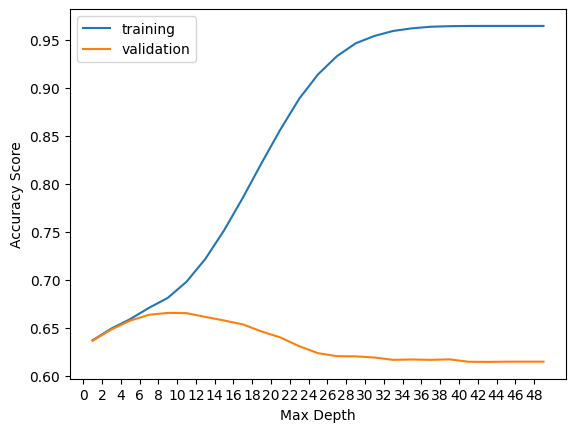

In [37]:
plt.plot(depth, training_acc, label = "training")
plt.plot(depth, validation_acc, label = "validation", )
plt.xlabel("Max Depth")
plt.xticks(np.arange(0,50,2))
plt.ylabel("Accuracy Score")
plt.legend()

#### it seems the depth of the model is best at 5
#### Now let's incorpoate the hyperparameter of max_depth = 5 into step 3

In [38]:
Decision_model = make_pipeline(
                                OrdinalEncoder(), 
                               DecisionTreeClassifier(random_state=42, max_depth=5)
                              )
Decision_model.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['land_surface_condition',
                                      'foundation_type', 'roof_type',
                                      'ground_floor_type', 'other_floor_type',
                                      'position', 'plan_configuration',
                                      'superstructure'],
                                mapping=[{'col': 'land_surface_condition',
                                          'data_type': dtype('O'),
                                          'mapping': Flat              1
Moderate slope    2
Steep slope       3
NaN              -2
dtype: int64},
                                         {'col': 'foundation_type',
                                          'dat...
has_superstructure_cement_mortar_brick     3
has_superstructure_adobe_mud               4
has_superstructure_mud_mortar_brick        5
has_superstructure_stone_flag              6
has_superstructure_cement_mortar_stone     7
has_superstructure_rc_engineered           8
has_superstructure_other                   9
has_superstructure_timber                 10
has_superstructure_bamboo                 11
NaN                                       -2
dtype: int64}])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

**Evaluation and Visualization - Decision Tree Classifier**
-

In [39]:
decision_test_score = Decision_model.score(X_test, y_test)

print("Accuracy score for the test data: ", round(decision_val_score,2))

Accuracy score for the test data:  0.61


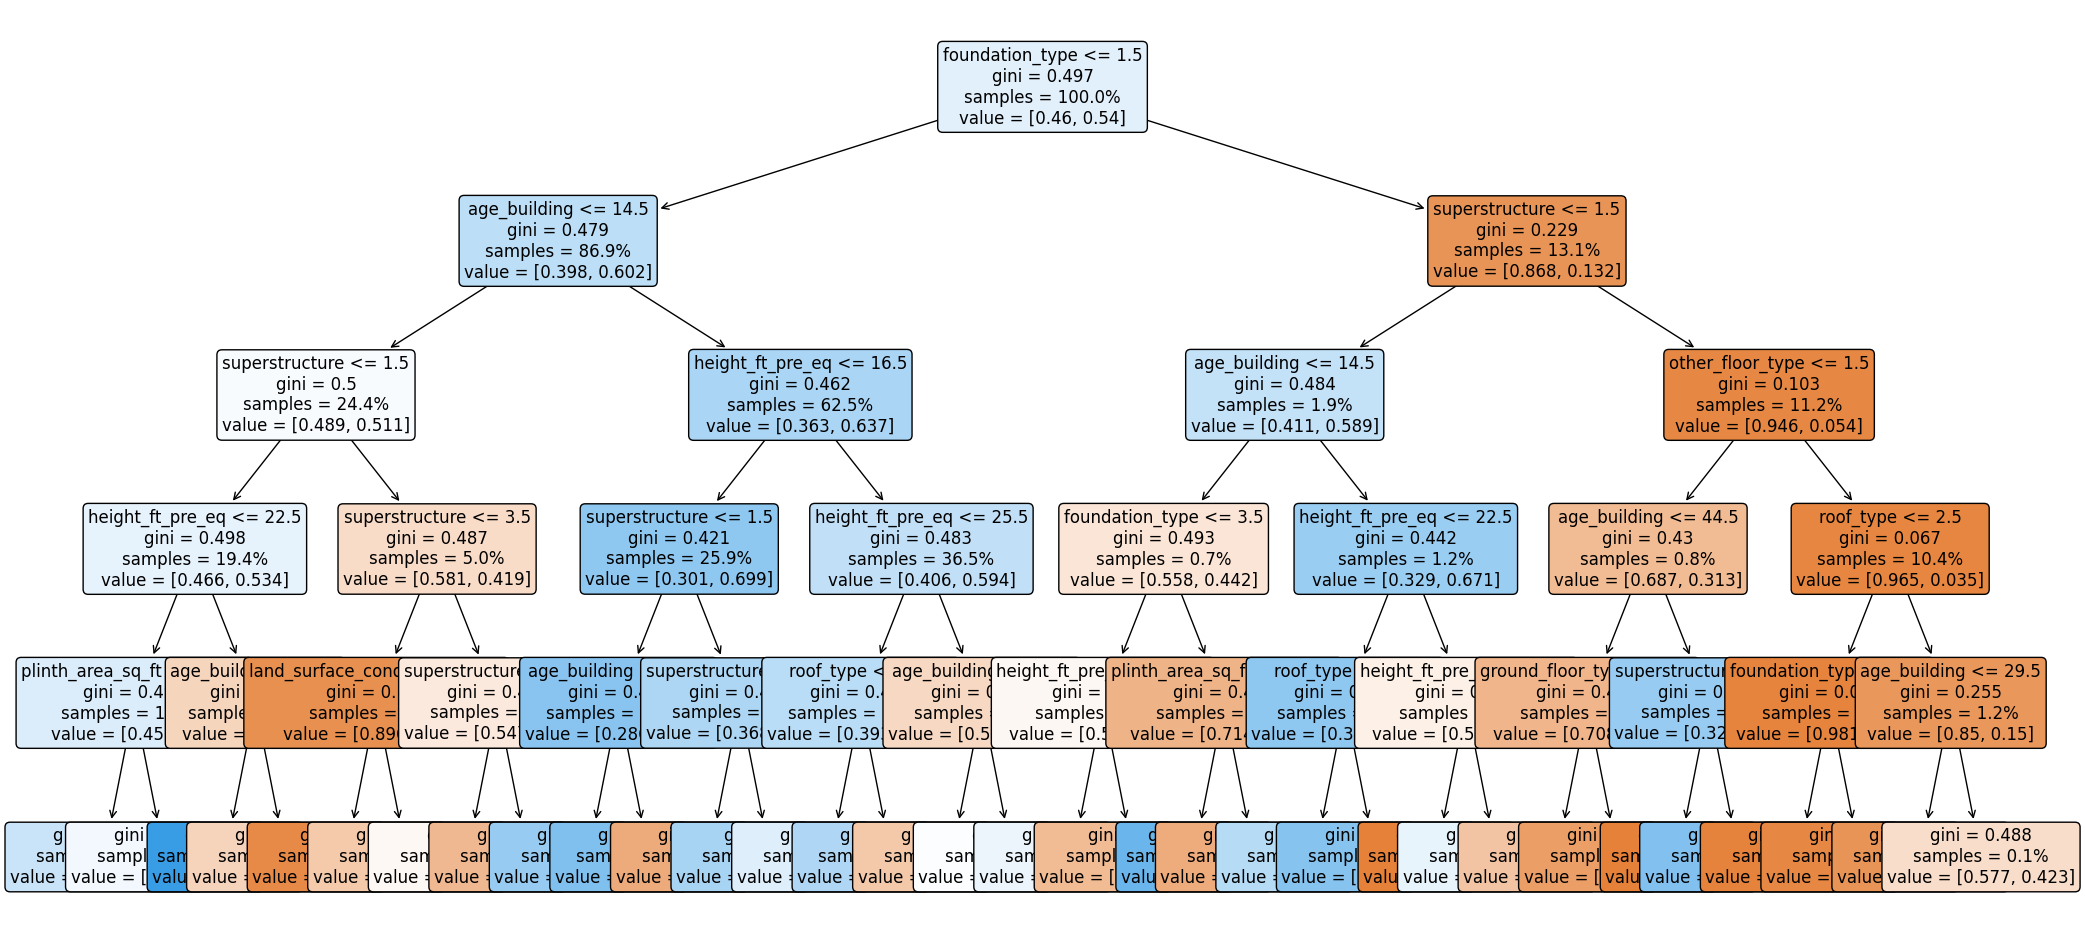

In [40]:
fig, ax = plt.subplots(figsize=(25, 12))
# Plot tree
plot_tree(
    decision_tree= Decision_model.named_steps["decisiontreeclassifier"], # decision tree model
    feature_names= X_train.columns.to_list(), # names of columns in training data X_train
    filled=True,  # Color leaf with class
    rounded=True,  # Round leaf edges
    proportion=True,  # Display proportion of classes in leaf
    max_depth=6,  # Only display first 3 levels
    fontsize=12,  # Enlarge font
    ax=ax,  # Place in figure axis
);

#### The diagram is the decision tree for the data and its depth to purified

#### Now, just like the Logistic Regression, let's see which features contributes to the chances of a building experiencing damage during an earthquake in Nepal district 24

In [41]:
features = X_train.columns
importance = Decision_model.named_steps["decisiontreeclassifier"].feature_importances_
feat_imp = pd.Series(importance,index = features).sort_values()
feat_imp

position                  0.000000
plan_configuration        0.000000
ground_floor_type         0.001133
land_surface_condition    0.001300
plinth_area_sq_ft         0.004641
other_floor_type          0.014612
roof_type                 0.015473
height_ft_pre_eq          0.079126
age_building              0.087504
superstructure            0.160113
foundation_type           0.636098
dtype: float64

Text(0.5, 1.0, 'Feature contribution to possible building damages')

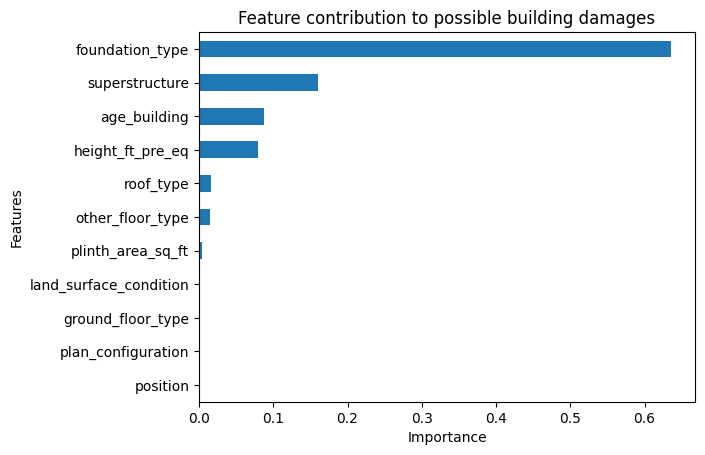

In [42]:
feat_imp.plot(kind = "barh", xlabel = "Importance", ylabel = "Features")
plt.title("Feature contribution to possible building damages")

#### It can be see that Foundation type is most responsible factor for probability of a building experiencing a damage during an earth quake in Nepal district 24

# Conclusion
#### This project was able to analyze and predict building damage in an earth quake situation in nepal district 24. I was able to show the main factors to be considered when building a structure. 
#### Thank You.